In [30]:
import pandas as pd
from matplotlib import pyplot as pp
import numpy as np
import datetime
from scipy import signal

In [33]:
df = pd.read_pickle("recording.pkl")
df.reset_index(inplace=True)

# shortcuts
channel = ["channel{}".format(i) for i in range(8)]
highlighted = "highlighted"
interval = "interval"
df.head()

,timestamp,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,highlighted,interval
0,2017-12-18 16:43:19.311396,855,1585,-28,-139,-1158,-871,0,705,362,False,0
1,2017-12-18 16:43:19.340382,-205,499,-1548,-2646,-1124,-1007,0,550,120,False,0
2,2017-12-18 16:43:19.347319,-155,391,-1656,-2124,-1086,-1069,0,669,212,False,0
3,2017-12-18 16:43:19.347978,-1326,-648,-342,597,-1071,-951,0,701,331,False,0
4,2017-12-18 16:43:19.757006,-3001,-975,-3022,-3936,-1888,-2048,0,1336,398,True,0


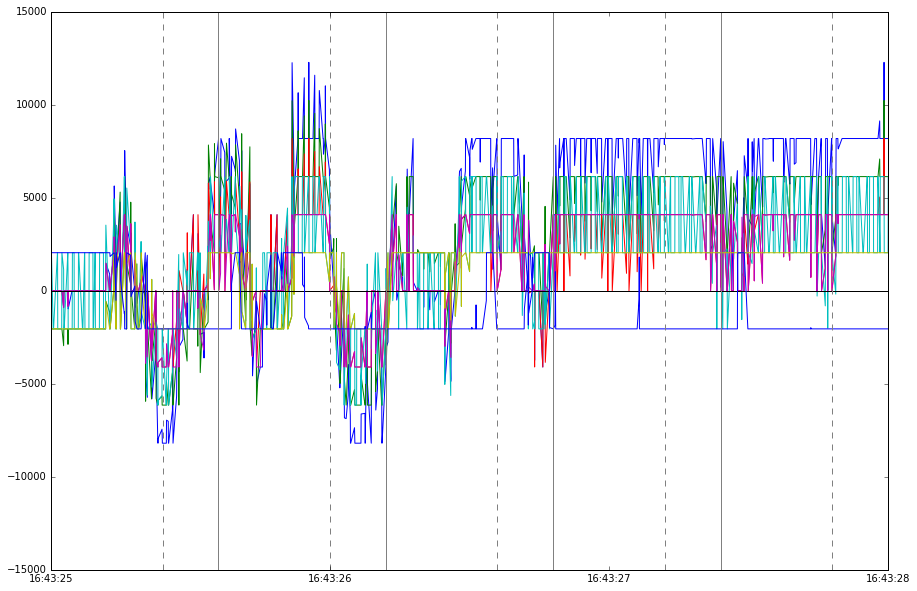

In [34]:
trial_info = df.groupby(["interval"], axis=0).first()[[highlighted, "timestamp"]]
trial_starts = trial_info["timestamp"]
trial_one_sec = trial_starts + datetime.timedelta(seconds=1)

pp.figure(figsize=(15,10))
pp.plot(df["timestamp"], df[channel].values)
trial_starts.map(lambda x: pp.axvline(x, color="gray", linestyle="solid"))
trial_one_sec.map(lambda x: pp.axvline(x, color="gray", linestyle="dashed"))
pp.xlim(trial_starts[10], trial_starts[15])
pp.show()

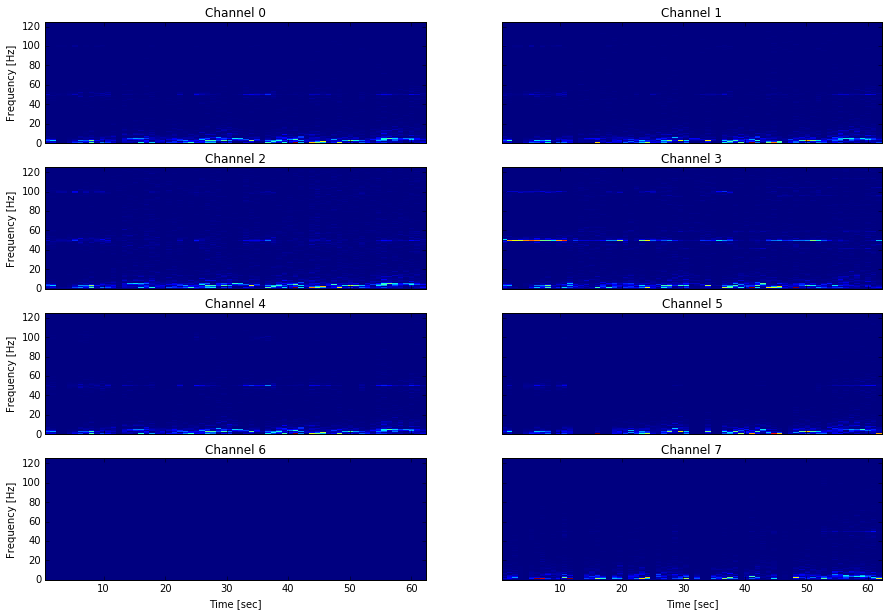

In [44]:
fig,axes = pp.subplots(ncols=2, nrows=4, figsize=(15,10), sharex=True, sharey=True)
for ch,ax in enumerate(axes.ravel()):
    f,t,Sxx = signal.spectrogram(df[channel[ch]], 250)
    ax.pcolormesh(t,f,Sxx)
    
    ax.set_title("Channel {}".format(ch))
    if ch%2 == 0:
        ax.set_ylabel('Frequency [Hz]')
    if ch//2 == 3:
        ax.set_xlabel('Time [sec]')
    
axes[0,0].set_xlim([t[0], t[-1]])
axes[0,0].set_ylim([f[0], f[-1]])
pp.show()